In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

# Shape and Size of Data

In [3]:
df.shape

(75903, 15)

In [5]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [6]:
df.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


# Data Cleaning 
• Removing unwanted columns
• Keeping only consistent teams
• Removing the first 5 overs data set in every match
• Converting the column 'date' from string into datetime object

In [6]:
# the details of what data set columns contain
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [7]:
# Removing unwanted columns from the dataset
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (75903, 15)
After removing unwanted columns: (75903, 9)


In [8]:
#the new data after removing the unwated columns
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [9]:
df.head(10)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
5,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.5,2,0,222
6,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,0.6,3,0,222
7,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,1.1,3,0,222
8,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,7,0,1.2,7,0,222
9,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,11,0,1.3,11,0,222


In [10]:
df.index

RangeIndex(start=0, stop=75903, step=1)

In [11]:
df['bat_team'].unique()
# the unique values of the batting team

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
#the consistent team which are playing again in the upcoming ipl
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [13]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (75903, 9)
After removing inconsistent teams: (53811, 9)


In [14]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [15]:
# Removing the first 5 overs data in every match in the ipl dataset
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [16]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


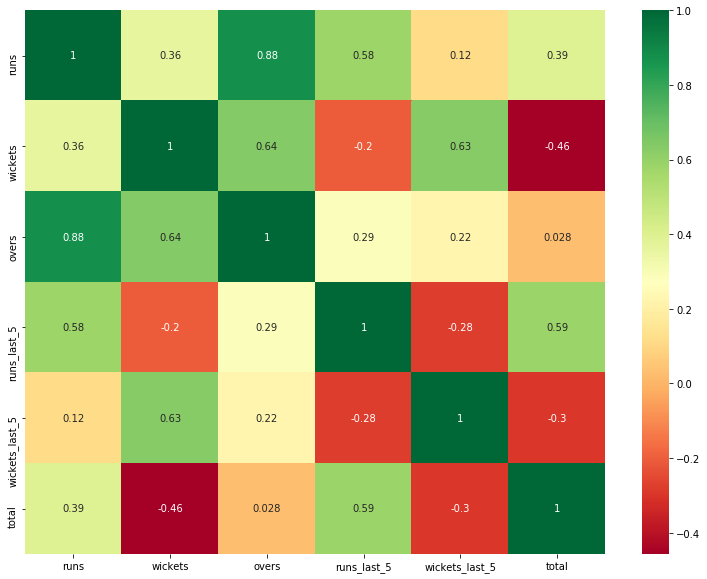

In [17]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

## Data Processing
• Handling categorical features
• Splitting dataset into train and test set on the basis of date

In [18]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [19]:
encoded_df.head(10)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37,2008-04-18,61,1,5.6,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [21]:
#Splitting data into test set and train set (2008-2016)-train, (2017)-test.
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values


In [22]:
# Removing the 'date' column from the data set (bcz date was only used to divide the data into train and test)
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


### Modle Building
I will experiment with 3 different algorithms, they are as follows:
• Linear Regression
• Random Forest Regression
• Decision Tree Regression

# Linear Regression 

In [23]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [25]:
# Linear Regression Evaluation of model
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("Linear Regression -Evaluation of model")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

Linear Regression -Evaluation of model
Mean Absolute Error (MAE): 12.118801745860331
Mean Squared Error (MSE): 251.04441806557338
Root Mean Squared Error (RMSE): 15.844381277461528


# Random forest

In [26]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [28]:
# Random Forest Regression -Evaluation of model
print("Random Forest Regression Evaluation of model")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

Random Forest Regression Evaluation of model
Mean Absolute Error (MAE): 13.696865830733543
Mean Squared Error (MSE): 328.2479601572374
Root Mean Squared Error (RMSE): 18.117614637618203


# Decision Tree

In [29]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [31]:
# Decision Tree Regression - Model Evaluation
print("Decision Tree Regression Evaluation of model")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

Decision Tree Regression Evaluation of model
Mean Absolute Error (MAE): 16.96796256299496
Mean Squared Error (MSE): 531.1501079913606
Root Mean Squared Error (RMSE): 23.04669407944143


# AdaBoost Algorithm

In [32]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=100,
                  random_state=None)

In [33]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [34]:
# AdaBoost Regression Evaluation of model
print("AdaBoost Regression Evaluation of model")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

AdaBoost Regression Evaluation of model
Mean Absolute Error (MAE): 12.120524120835075
Mean Squared Error (MSE): 246.2610412549044
Root Mean Squared Error (RMSE): 15.692706626165686


# Predictions
• Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)
• Model tested on data from IPL Season 10 ie: (2017)
• Model predicts on data from IPL Seasons 11 to 12 ie: (2018 to 2020)

In [37]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

# Prediction 1
• Date: 14th April 2019
• IPL : Season 12
• Match number: 30
• Teams: Sunrisers Hyderabad vs. Delhi Daredevils
• First Innings final score: 155/7


In [38]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 157 to 172


# Prediction 2

In [39]:
final_score = predict_score(batting_team='Chennai Super Kings', bowling_team='Sunrisers Hyderabad', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 140 to 155


# Prediction 3

In [40]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195


# Prediction 4

In [43]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 138 to 153
